In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

In [192]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from lightgbm import LGBMRegressor
import pickle
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [92]:
# Fields_Summary
Fields_Summary = pd.read_excel('ML Data.xlsx', sheet_name = 1)

# Cars Data
data = pd.read_excel('ML Data.xlsx', sheet_name = 0)
data.head(5)

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-03-02 15:43:00,2008,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,1/16/19 13:02,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-09-02 13:31:00,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,aj_04,1/18/19 11:02,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,aj_05,1/27/19 12:12,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0


In [93]:
rows, cols = data.shape
print("Number of rows : {} & Number of columns: {}".format(rows, cols))

Number of rows : 26307 & Number of columns: 73


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   appointmentId                                              26307 non-null  object 
 1   inspectionStartTime                                        26307 non-null  object 
 2   year                                                       26307 non-null  int64  
 3   month                                                      26307 non-null  int64  
 4   engineTransmission_battery_value                           26307 non-null  object 
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object 
 6   engineTransmission_battery_cc_value_1                      430 non-null    object 
 7   engineTransmission_battery_cc_value_2                      72 non-null     object 
 8   engine

- in above we see that type of inspectionStartTime column is object and it is date type column so we need to change its data type o date and time

In [95]:
data['inspectionStartTime']= pd.to_datetime(data['inspectionStartTime'])

In [96]:
data.describe()

,year,month,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_cc_value_10,odometer_reading,rating_engineTransmission
count,26307.000000,26307.000000,0.0,0.0,26307.000000,26307.000000
mean,2010.856578,5.462006,NaN,NaN,76460.143764,3.624663
std,3.766234,3.583866,NaN,NaN,46762.524489,0.847645
min,1989.000000,1.000000,NaN,NaN,1.000000,0.500000
25%,2008.000000,2.000000,NaN,NaN,46396.000000,3.500000
50%,2011.000000,5.000000,NaN,NaN,72013.000000,4.000000
75%,2014.000000,9.000000,NaN,NaN,98289.500000,4.000000
max,2019.000000,12.000000,NaN,NaN,999999.000000,5.000000


In [97]:
# Null values in DB 
print("Null values:\n", data.isnull().sum())

Null values:
 appointmentId                                                    0
inspectionStartTime                                              0
year                                                             0
month                                                            0
engineTransmission_battery_value                                 0
engineTransmission_battery_cc_value_0                        22869
engineTransmission_battery_cc_value_1                        25877
engineTransmission_battery_cc_value_2                        26235
engineTransmission_battery_cc_value_3                        26291
engineTransmission_battery_cc_value_4                        26303
engineTransmission_engineoilLevelDipstick_value                  0
engineTransmission_engineOilLevelDipstick_cc_value_0         25896
engineTransmission_engineOil                                     0
engineTransmission_engineOil_cc_value_0                       7750
engineTransmission_engineOil_cc_value_1         

In [98]:
# Null values in DB percentage 
pd.set_option('display.max_rows', 73)
(data.isnull().sum() * 100 / data.shape[0]).sort_values(ascending=False)

engineTransmission_engine_cc_value_10                        100.000000
engineTransmission_engineOil_cc_value_9                      100.000000
engineTransmission_clutch_cc_value_6                          99.996199
engineTransmission_engineOil_cc_value_8                       99.992397
engineTransmission_engine_cc_value_9                          99.988596
engineTransmission_battery_cc_value_4                         99.984795
engineTransmission_engine_cc_value_8                          99.984795
engineTransmission_clutch_cc_value_5                          99.973391
engineTransmission_coolant_cc_value_3                         99.969590
engineTransmission_engine_cc_value_7                          99.969590
engineTransmission_engineOil_cc_value_7                       99.958186
engineTransmission_comments_value_4                           99.946782
engineTransmission_battery_cc_value_3                         99.939180
engineTransmission_engine_cc_value_6                          99

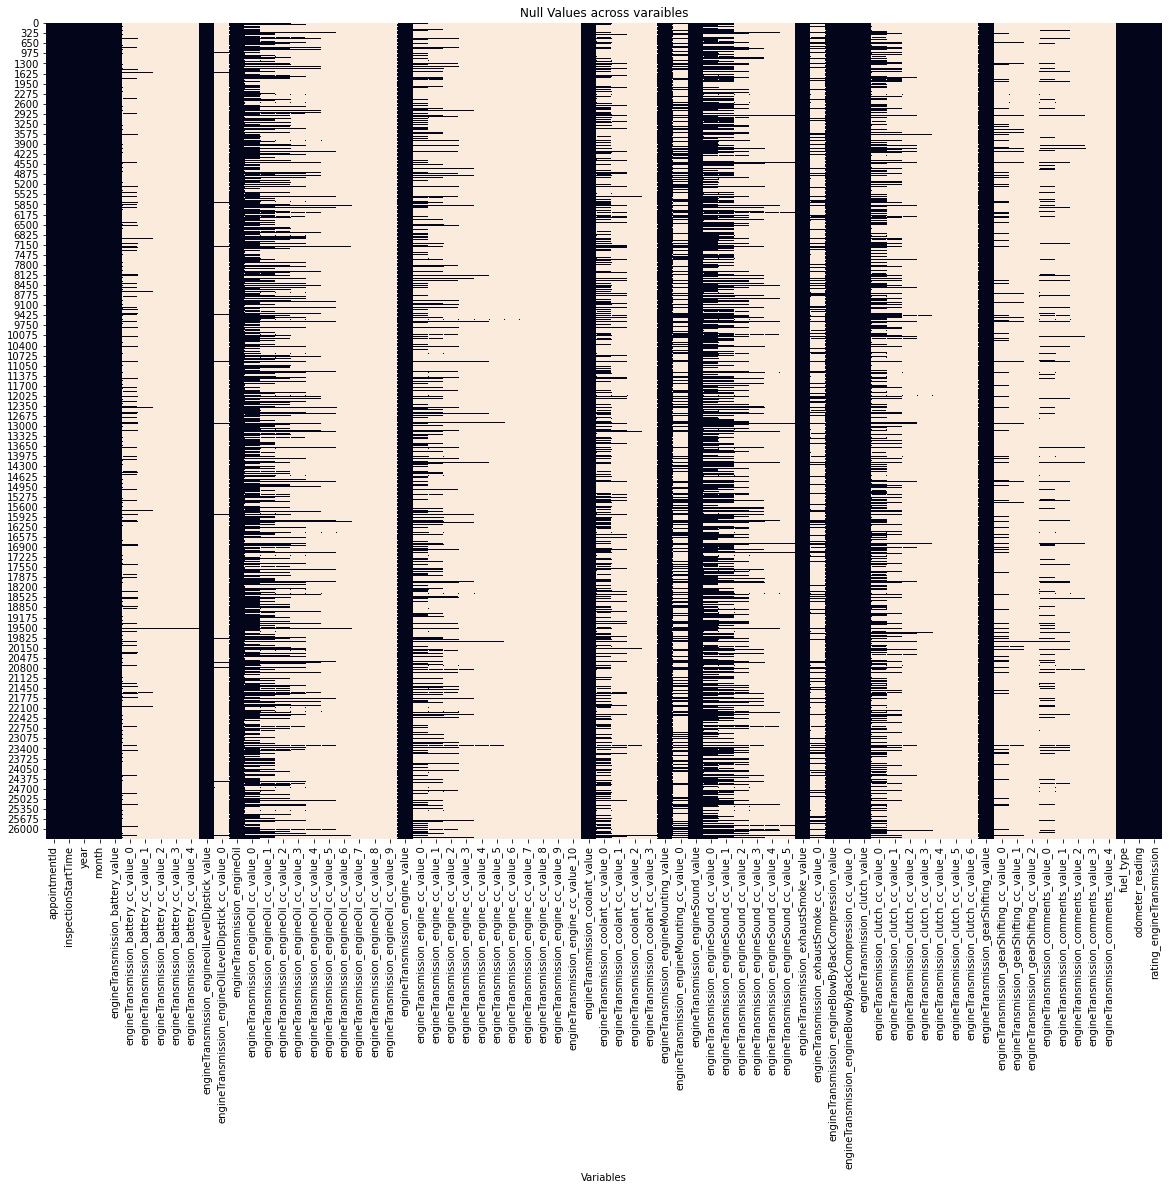

In [99]:
#  Plotting the null values heatmap
# plt.style.use('seaborn-colorblind')
plt.figure(figsize=(20, 15))
sns.heatmap(data.isnull(), cbar=False)
plt.xlabel("Variables")
plt.title("Null Values across varaibles")
plt.show()

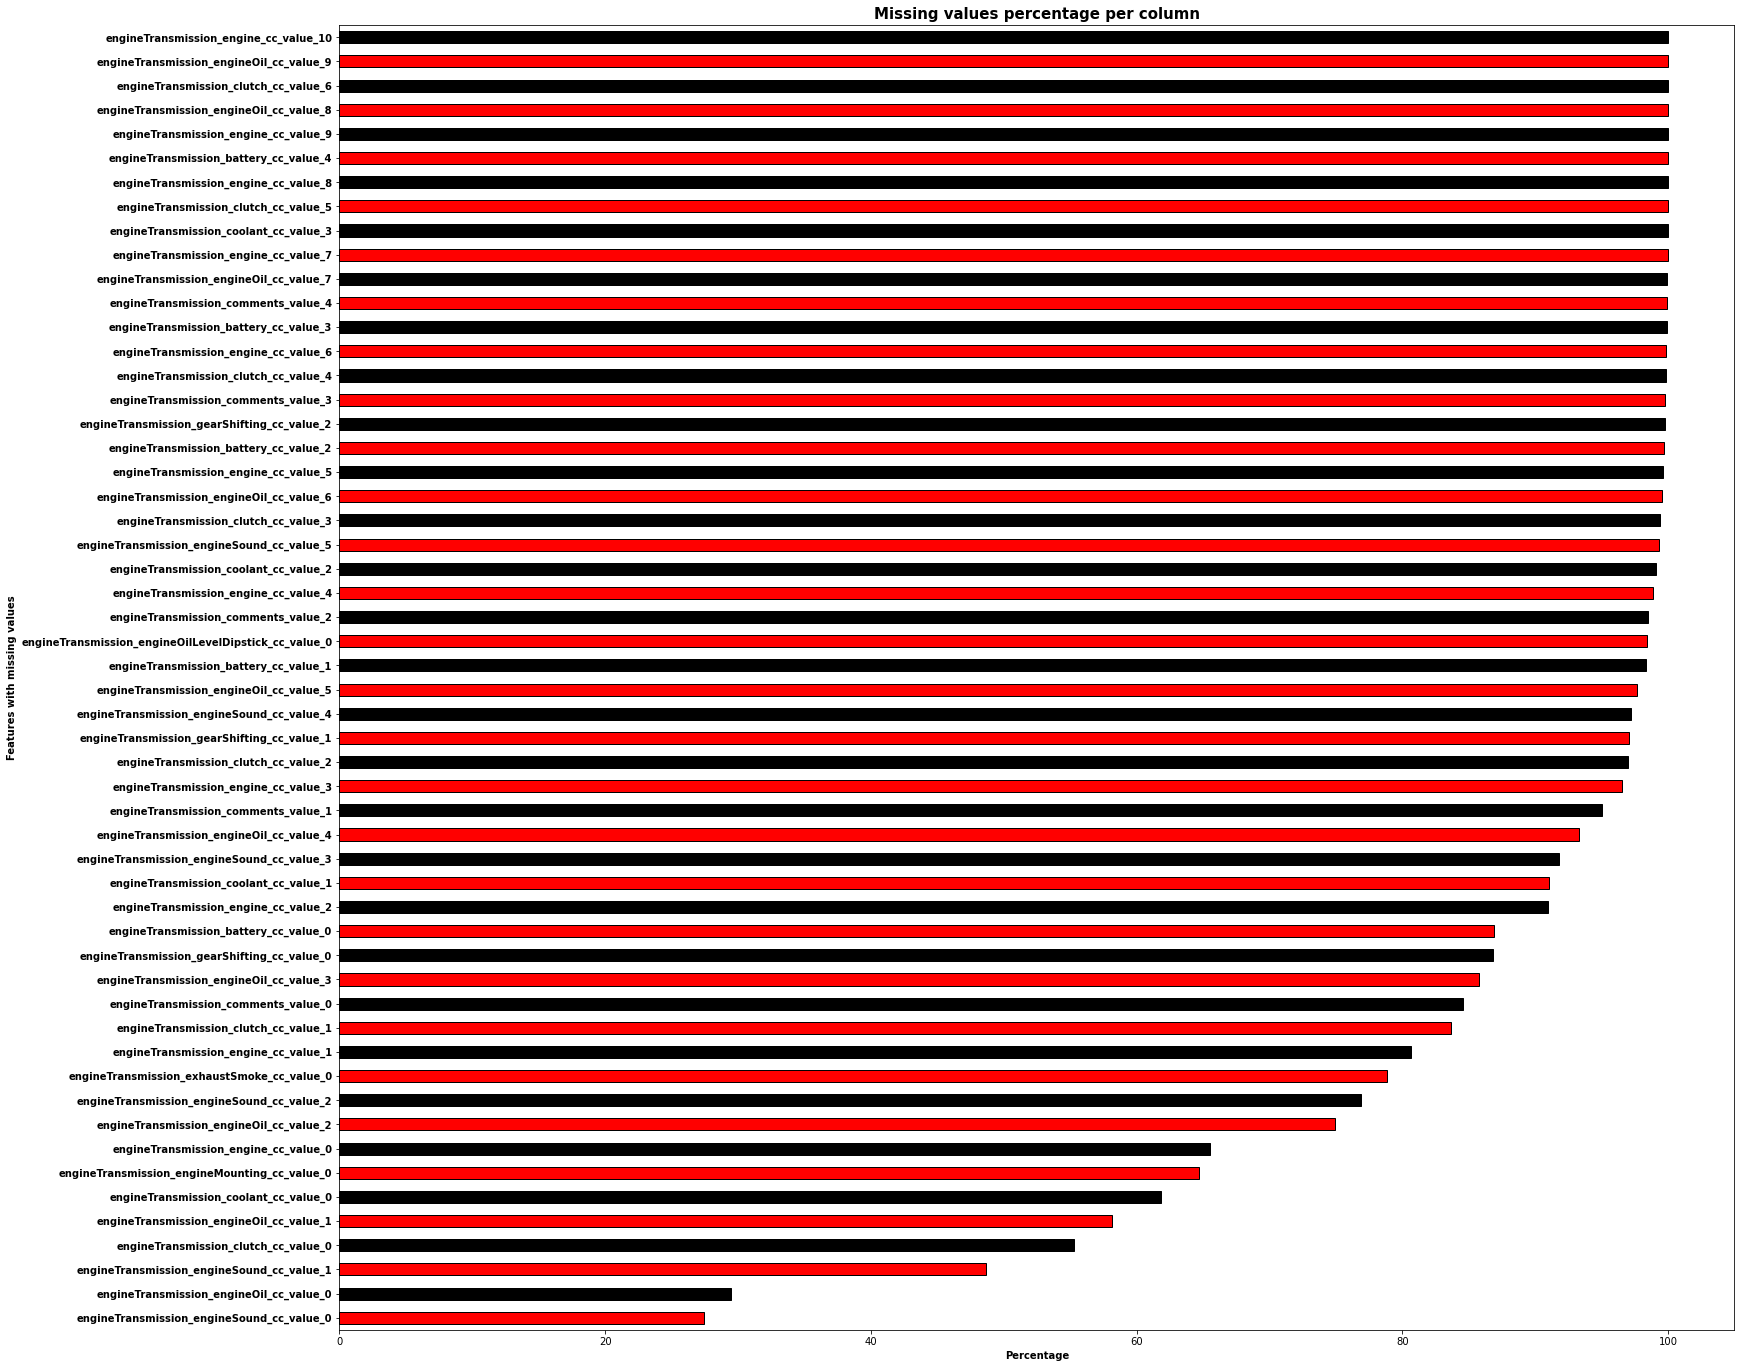

In [100]:
allna = (data.isnull().sum() / len(data))*100
allna = allna.drop(allna[allna == 0].index).sort_values()
plt.figure(figsize=(25, 24))
allna.plot.barh(color=('red', 'black'), edgecolor='black')
plt.title('Missing values percentage per column', fontsize=15, weight='bold' )
plt.xlabel('Percentage', weight='bold', size=10)
plt.ylabel('Features with missing values', weight='bold')
plt.yticks(weight='bold')
plt.show()

In [101]:
# 3. Extracting the variables having more than 40% null values
null_values  = data.columns[data.isnull().sum() * 100 / data.shape[0] > 40]
print("Total number of columns which has more than 40% null values in it: {}".format(len(null_values)))

Total number of columns which has more than 40% null values in it: 52


- 52 out of 73 independent varaibles have more then 40% null values.

In [102]:
Fields_Summary = pd.read_excel('ML Data.xlsx', sheet_name = 1)
Fields_Summary

,Columns,Description,Variable
0,appointmentId,Unique id,Independent
1,inspectionStartTime,inspection date,Independent
2,year,registration year,Independent
3,month,registration month,Independent
4,engineTransmission_battery_value,condition ok: yes\nelse : no,Independent
5,engineTransmission_battery_cc_value_0,current condition if not yes,Independent
6,engineTransmission_battery_cc_value_1,current condition if not yes,Independent
7,engineTransmission_battery_cc_value_2,current condition if not yes,Independent
8,engineTransmission_battery_cc_value_3,current condition if not yes,Independent
9,engineTransmission_battery_cc_value_4,current condition if not yes,Independent


- lest say hypothesis
- From the Fields_Summary, it seems that null values have to be imputed as "yes" in most of columns.

In [103]:
# Checking the above hypothesis
set_A = set(Fields_Summary[Fields_Summary['Description'] == "current condition if not yes"]['Columns'])
set_B = set(null_values)

# Performing an intersection of both the sets
set_A.intersection(set_B)

{'engineTransmission_battery_cc_value_0',
 'engineTransmission_battery_cc_value_1',
 'engineTransmission_battery_cc_value_2',
 'engineTransmission_battery_cc_value_3',
 'engineTransmission_battery_cc_value_4',
 'engineTransmission_clutch_cc_value_0',
 'engineTransmission_clutch_cc_value_1',
 'engineTransmission_clutch_cc_value_2',
 'engineTransmission_clutch_cc_value_3',
 'engineTransmission_clutch_cc_value_4',
 'engineTransmission_clutch_cc_value_5',
 'engineTransmission_clutch_cc_value_6',
 'engineTransmission_coolant_cc_value_0',
 'engineTransmission_coolant_cc_value_1',
 'engineTransmission_coolant_cc_value_2',
 'engineTransmission_coolant_cc_value_3',
 'engineTransmission_engineMounting_cc_value_0',
 'engineTransmission_engineOilLevelDipstick_cc_value_0',
 'engineTransmission_engineOil_cc_value_1',
 'engineTransmission_engineOil_cc_value_2',
 'engineTransmission_engineOil_cc_value_3',
 'engineTransmission_engineOil_cc_value_4',
 'engineTransmission_engineOil_cc_value_5',
 'engineT

In [104]:
len(set_A.intersection(set_B))

47

- 47 out of 53 variables have a description of "current condition if not yes"
- hance we can conclude that our hypothesis is true, out of 52 columns 47 column has yes as defult value so we fill the null value of all 47 columns as yes.

- lest check other 4 columes those has null value but condtion is other then current "condition if not yes"

In [105]:
# Check for rest of the null variables
var_null = [var for var in null_values if var not in list(set_A.intersection(set_B))]
null_V = data[var_null]
null_V

,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4
0,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
26302,Electrical wiring Damaged,NaN,NaN,NaN,NaN
26303,NaN,NaN,NaN,NaN,NaN
26304,NaN,NaN,NaN,NaN,NaN
26305,NaN,NaN,NaN,NaN,NaN


In [106]:
print(" * Out of 26307 row this many of percentage of null values are there in : ")
print(null_V.isnull().sum() *100 / 26307)

 * Out of 26307 row this many of percentage of null values are there in : 
engineTransmission_comments_value_0    84.544038
engineTransmission_comments_value_1    95.027939
engineTransmission_comments_value_2    98.517505
engineTransmission_comments_value_3    99.775725
engineTransmission_comments_value_4    99.946782
dtype: float64


- As we can analyze that in above columns has more the 80% of null values and they are also not under condition of 40% more null values in it.
- we have 2 options over here 
   1. drop those colums
   3. We can impute "no" in above columns as mentioned in Fields_Summary
  

- it is better to drop those colums as they are not important as per above analysis

In [107]:
data.drop(null_V, axis=1, inplace=True)

Now we can impute yes in null values as per Fields_Summary  

In [108]:
data = data.fillna('yes')  

In [109]:
data.isnull().sum().sum()

0

- now we don't have any null values in DB

In [110]:
data.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-03-02 15:43:00,2008,8,No,Weak,yes,yes,yes,yes,...,yes,yes,yes,Yes,yes,yes,yes,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:00,2007,5,Yes,yes,yes,yes,yes,yes,...,yes,yes,yes,Yes,yes,yes,yes,Petrol + CNG,78108,4.0
2,aj_03,2019-09-02 13:31:00,2012,5,Yes,yes,yes,yes,yes,yes,...,yes,yes,yes,Yes,yes,yes,yes,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:00,2013,1,Yes,yes,yes,yes,yes,yes,...,yes,yes,yes,Yes,yes,yes,yes,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:00,2011,7,Yes,yes,yes,yes,yes,yes,...,yes,yes,yes,Yes,yes,yes,yes,Petrol + CNG,74368,4.0


In [111]:
categorical_data = data.select_dtypes(include=['object']).columns
vriable_data = [cols for cols in data.columns if cols not in categorical_data]
print("Total Categorcal data in DB : ",len(categorical_data))
print("total vraible data in DB including target variable : ",len(vriable_data))

Total Categorcal data in DB :  63
total vraible data in DB including target variable :  5


In [112]:
vriable_data

['inspectionStartTime',
 'year',
 'month',
 'odometer_reading',
 'rating_engineTransmission']

- here we can see that out of 68 columns 63 are categorical data type and only 5 are variable data type 
- which means 92% data are categorical data type
and only 7.3% data are varibale data type 

## EDA 

In [113]:
data.describe()

,year,month,odometer_reading,rating_engineTransmission
count,26307.000000,26307.000000,26307.000000,26307.000000
mean,2010.856578,5.462006,76460.143764,3.624663
std,3.766234,3.583866,46762.524489,0.847645
min,1989.000000,1.000000,1.000000,0.500000
25%,2008.000000,2.000000,46396.000000,3.500000
50%,2011.000000,5.000000,72013.000000,4.000000
75%,2014.000000,9.000000,98289.500000,4.000000
max,2019.000000,12.000000,999999.000000,5.000000


- here we can see that 
    1. max registration year is 2019 and min registration year is 1989
    2. Odo meter reading is range from 1 to 999999   
    (An odometer is a device that is used for measuring the distance traveled by a vehicle.)
    3. Rating Engine Transmission ranges 0.50 to 5.0  and avg is 3.62

In [114]:
# 1. inspectionStartTime
min_timestamp = data['inspectionStartTime'].min()
max_timestamp = data['inspectionStartTime'].max()

print(min_timestamp, max_timestamp)

2019-01-02 10:05:00 2019-12-04 19:30:00


- inspection Start Time is  2019-01-02 10:05:00 to 2019-12-04 19:30:00

- we need to saprat the date time year and time from inspectionStartTime column

In [115]:
# inspection_Date = data['inspectionStartTime'].dt.date

In [116]:
# Extract the inspection month, day & hour
inspection_Date = data['inspectionStartTime'].dt.date
inspection_Month = data['inspectionStartTime'].dt.month
inspection_WeekDay = data['inspectionStartTime'].dt.dayofweek
inspection_Day = data['inspectionStartTime'].dt.day
inspection_Hour = data['inspectionStartTime'].dt.hour

# Insert into the dataframe
data.insert(2,'inspection_Date', inspection_Date)
data.insert(3,'inspection_Month', inspection_Month)
data.insert(4,'inspection_Day', inspection_Day)
data.insert(5,'inspection_WeekDay', inspection_WeekDay)
data.insert(6,'inspection_Hour', inspection_Hour)

In [117]:
data.head()

,appointmentId,inspectionStartTime,inspection_Date,inspection_Month,inspection_Day,inspection_WeekDay,inspection_Hour,year,month,engineTransmission_battery_value,...,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-03-02 15:43:00,2019-03-02,3,2,5,15,2008,8,No,...,yes,yes,yes,Yes,yes,yes,yes,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:00,2019-01-16,1,16,2,13,2007,5,Yes,...,yes,yes,yes,Yes,yes,yes,yes,Petrol + CNG,78108,4.0
2,aj_03,2019-09-02 13:31:00,2019-09-02,9,2,0,13,2012,5,Yes,...,yes,yes,yes,Yes,yes,yes,yes,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:00,2019-01-18,1,18,4,11,2013,1,Yes,...,yes,yes,yes,Yes,yes,yes,yes,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:00,2019-01-27,1,27,6,12,2011,7,Yes,...,yes,yes,yes,Yes,yes,yes,yes,Petrol + CNG,74368,4.0


In [118]:
data.groupby('inspection_Date').count()['appointmentId']

inspection_Date
2019-01-02    203
2019-01-03    199
2019-01-04    227
2019-01-13    369
2019-01-14    220
             ... 
2019-11-04    266
2019-12-01    314
2019-12-02    236
2019-12-03    219
2019-12-04    240
Name: appointmentId, Length: 102, dtype: int64

In [119]:
# print(plt.style.available)

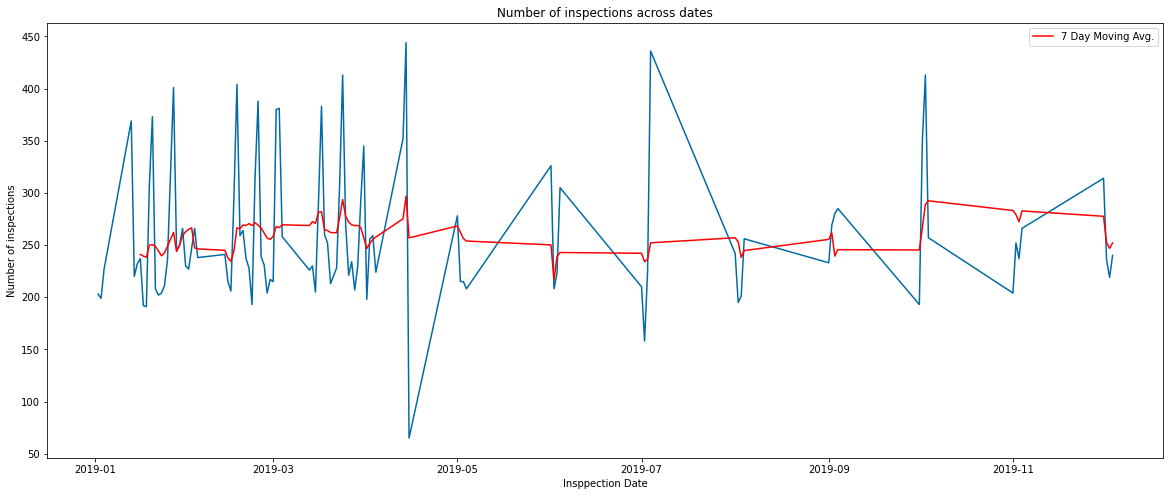

In [120]:
# 2. inspectionDate
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(20, 8))
plt.plot(data.groupby('inspection_Date').count()['appointmentId'])
data.groupby('inspection_Date').count()['appointmentId'].rolling(7).mean().plot(label='7 Day Moving Avg.', color='red')
plt.xlabel("Insppection Date")
plt.ylabel("Number of inspections")
plt.title("Number of inspections across dates")
plt.legend()
plt.show()

<AxesSubplot:xlabel='inspection_Date'>

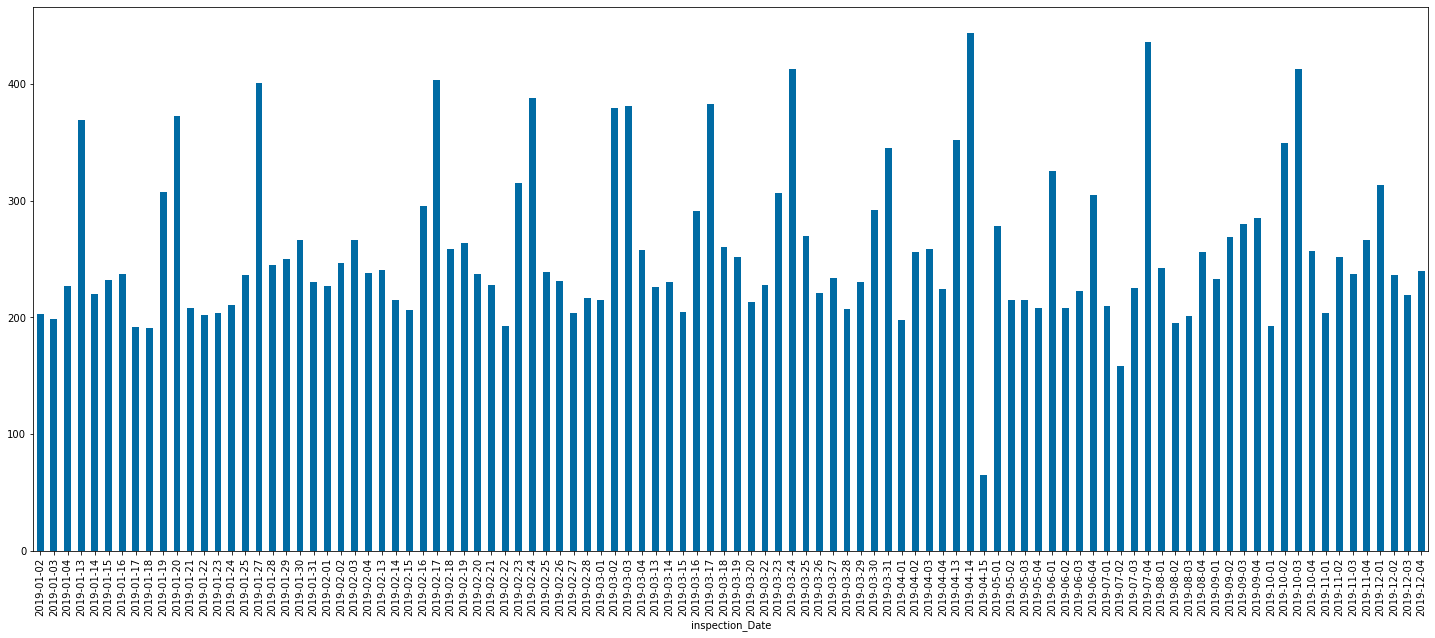

In [121]:
week_groups = (data.groupby('inspection_Date').count()['appointmentId'])
week_groups.plot(kind='bar',figsize=(25,10),legend=None)

- weekly there are 250 to 300 inspection has been done

- Cacluating the daily average

In [122]:
# Cacluating the daily average
daily_avg = data.groupby('inspection_Date').count()['appointmentId'].mean()
print("Average daily inspections : {:.2f}".format(daily_avg))

Average daily inspections : 257.91


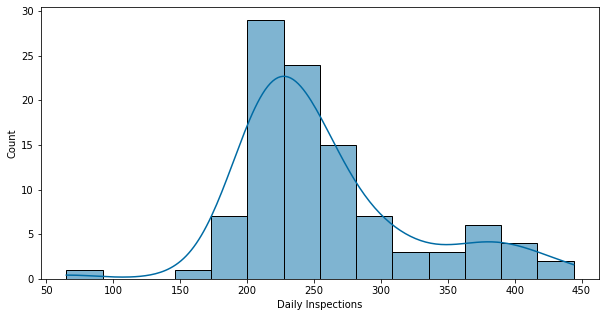

In [123]:
# Daily Inspections histogram
plt.figure(figsize=(10,5))
sns.histplot(data.groupby('inspection_Date').count()['appointmentId'], kde=True)
plt.xlabel("Daily Inspections")
plt.show()

### Cacluating the Monthly inspection

In [124]:
data['inspection_Month'].unique()

array([ 3,  1,  9,  4,  8,  5,  6,  2,  7, 10, 12, 11], dtype=int64)

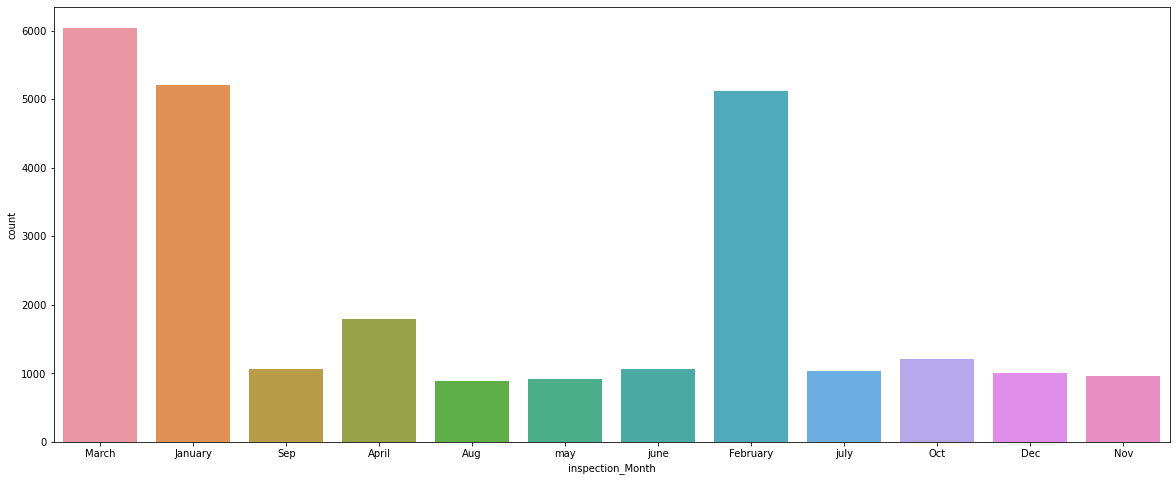

In [125]:
# Performing a similar analysis across month
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='inspection_Month', order=[3,  1,  9,  4,  8,  5,  6,  2,  7, 10, 12, 11])
plt.xticks(np.arange(0,12), labels = ["March", "January",'Sep', "April",'Aug','may','june',
                                      "February",'july','Oct',"Dec",'Nov'])

plt.show()

In [126]:
data.groupby("inspection_Month", sort=False).count()['appointmentId']

inspection_Month
3     6041
1     5204
9     1067
4     1798
8      894
5      916
6     1062
2     5115
7     1029
10    1213
12    1009
11     959
Name: appointmentId, dtype: int64

- Few high spikes of inspections can be seen on March, January, & February of the year.

### inspections across Day of Month

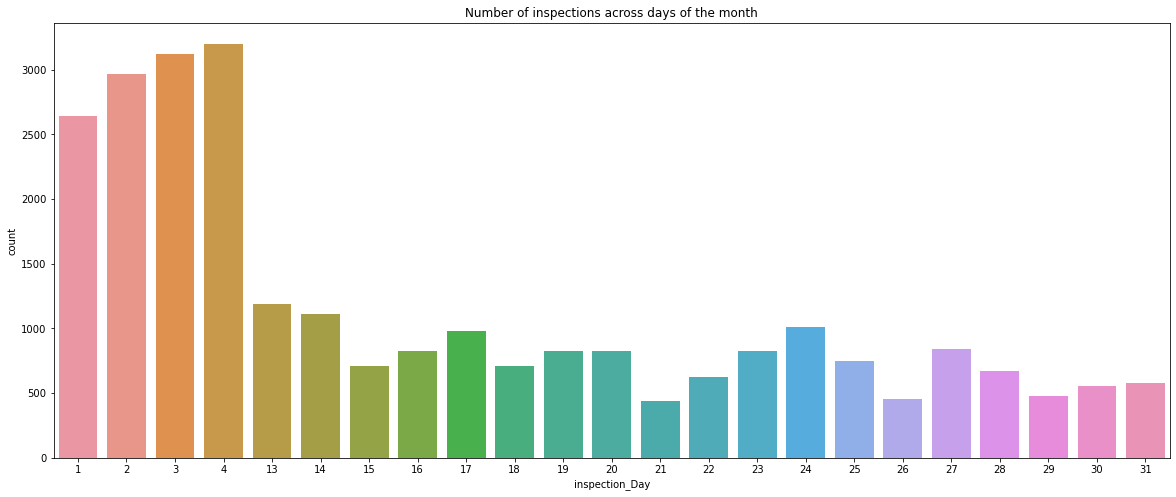

In [127]:
# Visualising number of inspections across Day of Month 
plt.figure(figsize=(20,8))
sns.countplot(data=data,x='inspection_Day')
plt.title("Number of inspections across days of the month")
plt.show()

- Few high spikes of inspections can be seen on 4rd, 3th, & 2th of the month.

### inspections across Week of year

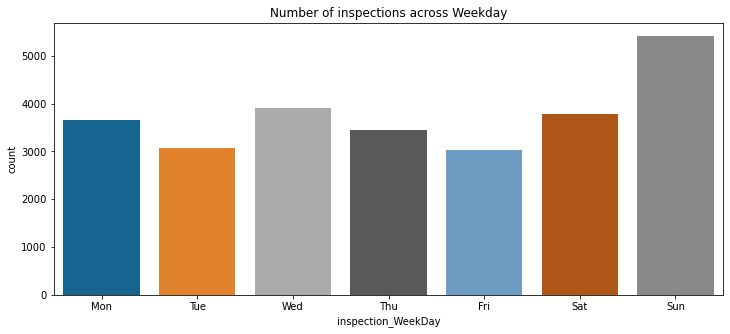

In [128]:
plt.figure(figsize=(12,5))
sns.countplot(data=data,x='inspection_WeekDay')
plt.title("Number of inspections across Weekday")
plt.xticks(np.arange(0, 7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

In [129]:
data.groupby("inspection_WeekDay", sort=False).count()['appointmentId']

inspection_WeekDay
5    3775
2    3902
0    3664
4    3029
6    5415
3    3459
1    3063
Name: appointmentId, dtype: int64

In [130]:
# average weekly inspections
avg_weekly_inspections = data.groupby("inspection_WeekDay").count()['appointmentId'].mean()
Average_Weekend=len(data.groupby("inspection_WeekDay").get_group(5)) + len(data.groupby("inspection_WeekDay").get_group(6))
print("Average Weekly Inspections: {}".format(avg_weekly_inspections))
print("Average Weekend Inspections: {}".format(Average_Weekend/2))

Average Weekly Inspections: 3758.1428571428573
Average Weekend Inspections: 4595.0


- here we conclude that inspection is done on weekend more as compare to weekdays

### inspection Hour in a year

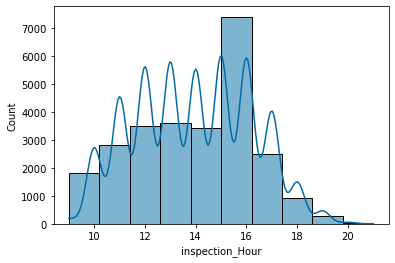

In [131]:
sns.histplot(data=data, x='inspection_Hour', kde=True, bins=10)
plt.show()

In [132]:
data['inspection_Hour'].value_counts() 

15    3727
16    3683
13    3594
12    3486
14    3427
11    2820
17    2505
10    1692
18     928
19     289
9      116
20      36
21       4
Name: inspection_Hour, dtype: int64

- As we can seen above most of inspection has been done between 12 PM to 4PM

### Analysis of registration year

<AxesSubplot:>

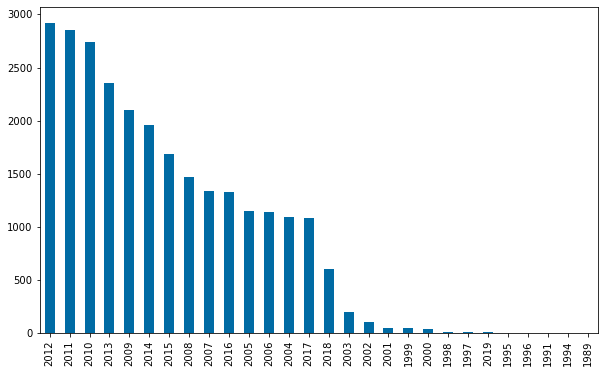

In [133]:
plt.subplots(figsize=(10,6))
data['year'].value_counts().plot(kind='bar')

In [134]:
# data['year'].value_counts()

print("Max Car Registration are in year 2012 : ",data['year'].value_counts().max())
print("Min Car Registration are in year 1989 : ",data['year'].value_counts().min())

Max Car Registration are in year 2012 :  2922
Min Car Registration are in year 1989 :  1


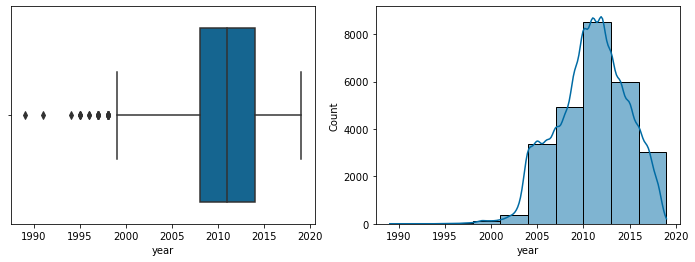

In [135]:
# year: registeration year
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data['year'], ax=ax[0])
sns.histplot(data['year'], bins=10, kde=True, ax=ax[1])
plt.show()

- with help of box plot we can say there are some outlier in DB

In [136]:
# Removing outlier
def remove_outlier(data, year):
    q1 = np.quantile(data[year], .25)#the median of the lower half 
    q3 = np.quantile(data[year], .75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    
    return data[(data[year] < upper_limit) & (data[year] > lower_limit)]
   
data = remove_outlier(data, 'year')

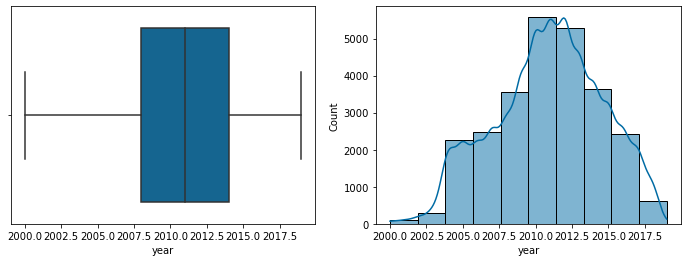

In [137]:
# after removing outliers
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data['year'], ax=ax[0])
sns.histplot(data['year'], bins=10, kde=True, ax=ax[1])
plt.show()

- after removing outliers

In [138]:
#data['year'].value_counts()

In [139]:
print("Max Car Registration are in year 2012 : ",data['year'].value_counts().max())
print("Min Car Registration are in year 2019 : ",data['year'].value_counts().min())

Max Car Registration are in year 2012 :  2922
Min Car Registration are in year 2019 :  10


In [140]:
data.shape

(26226, 73)

### Analysis of registration month

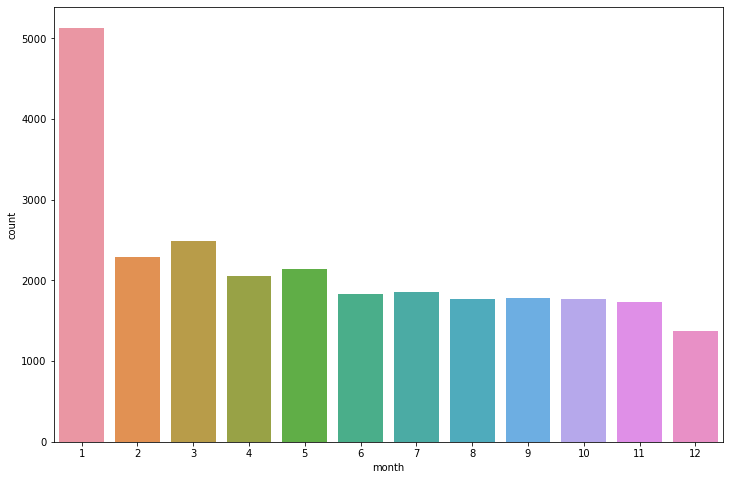

In [141]:
# month: registeration month
plt.figure(figsize=(12, 8))
sns.countplot(data['month'])
plt.show()

In [142]:
#data['month'].value_counts()

In [143]:
print("Max Car Registration are in January : ",data['month'].value_counts().max())
print("Min Car Registration are in December : ",data['month'].value_counts().min())

Max Car Registration are in January :  5132
Min Car Registration are in December :  1371


### Analysis of categorical_data

- here we are considering appointmentId becouse it is unique

In [144]:
categorical_data = categorical_data.drop('appointmentId')

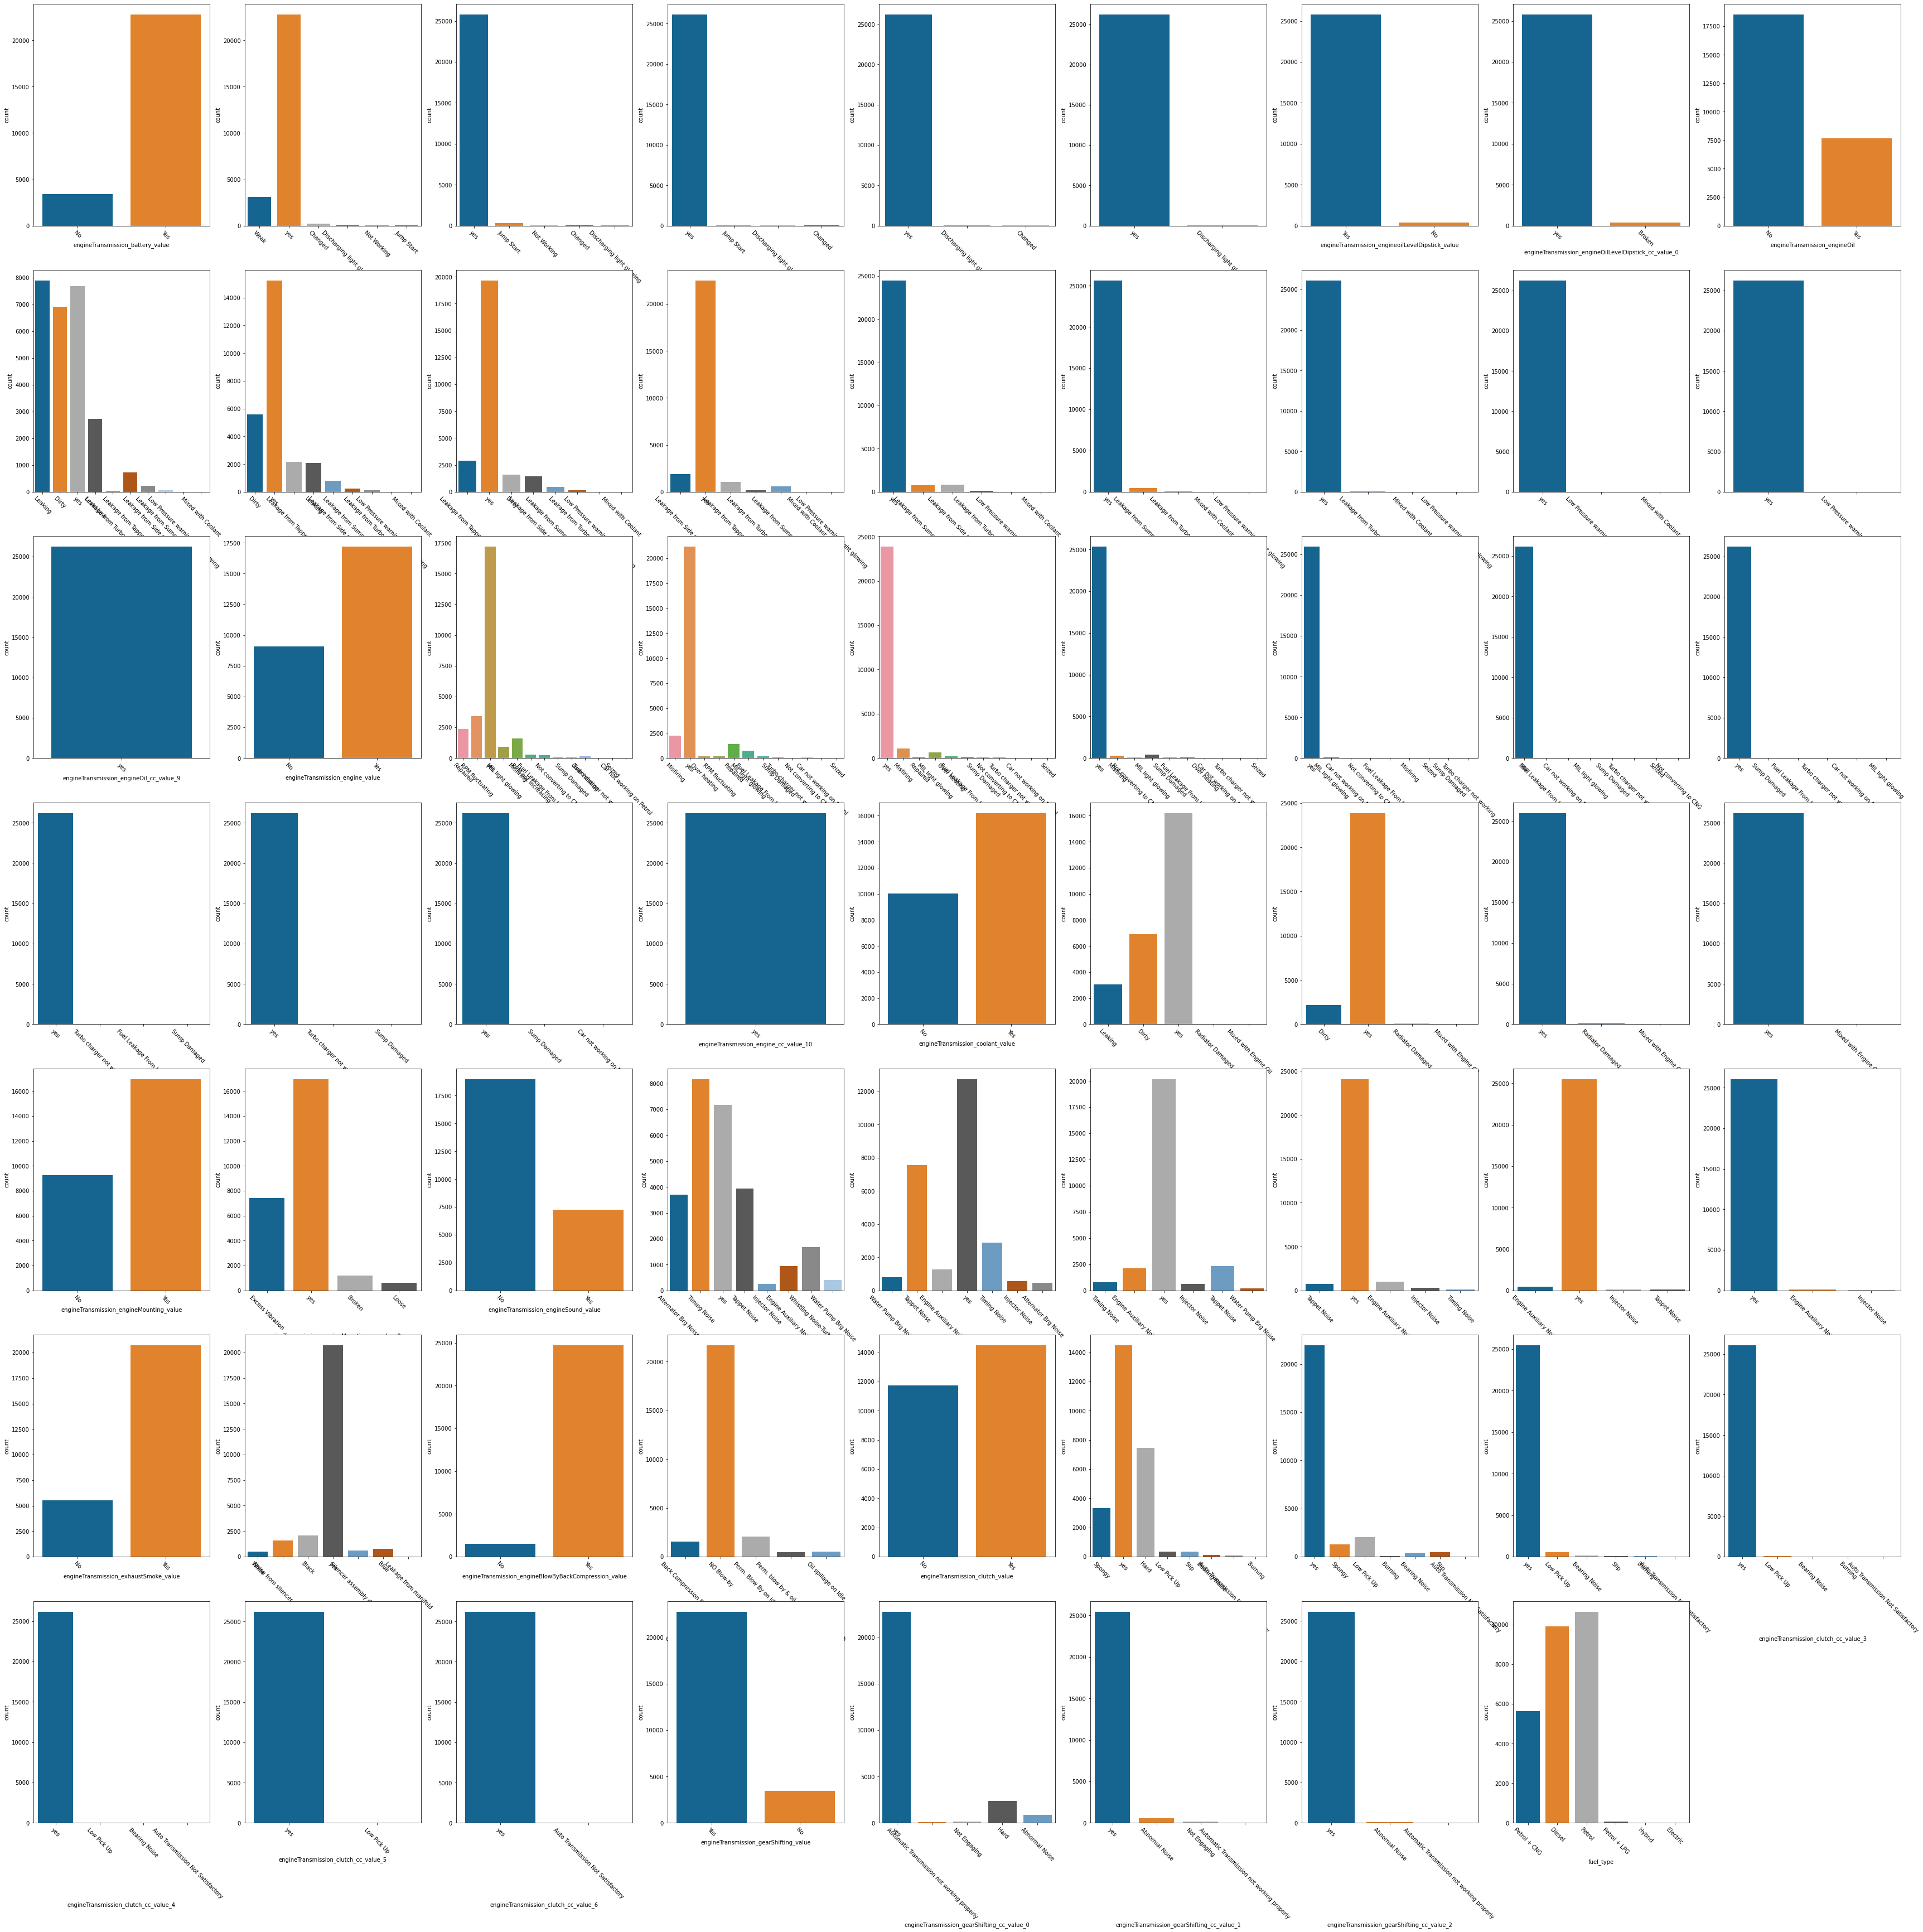

In [145]:
# Next we have a set of categorical columns, plotting the count distribution
fig = plt.figure(figsize=(60, 60))
for i, col in enumerate(categorical_data):
    plt.subplot(7, 9, i+1)
    sns.countplot(data[col])
    plt.xticks(rotation=-45)
plt.show()

- Categorical data with high frequency

#### Analysis of odo meter data

In [146]:
data['odometer_reading'].value_counts()

100000    8
46898     5
75585     4
67537     4
14352     4
         ..
38784     1
129861    1
50857     1
6985      1
316522    1
Name: odometer_reading, Length: 23827, dtype: int64

In [147]:
# data['odometer_reading'].value_counts()

print("Max Car odometer_reading 100000  : ",data['odometer_reading'].value_counts().max())
print("Min Car odometer_reading : ",data['odometer_reading'].value_counts().min())

Max Car odometer_reading 100000  :  8
Min Car odometer_reading :  1


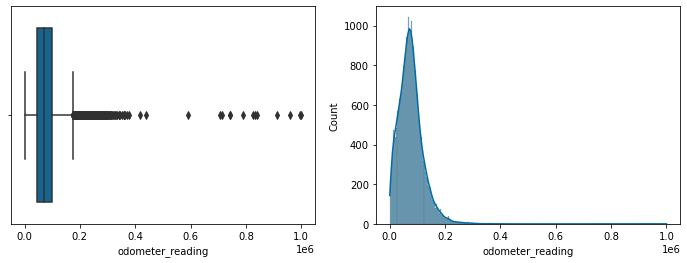

In [148]:
# odometer_reading
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data['odometer_reading'], ax=ax[0])
sns.histplot(data['odometer_reading'], kde=True, ax=ax[1])
plt.show()

- Odometer observation with a lot of outliers.

In [149]:
# Removing outliers 
data = remove_outlier(data, 'odometer_reading')

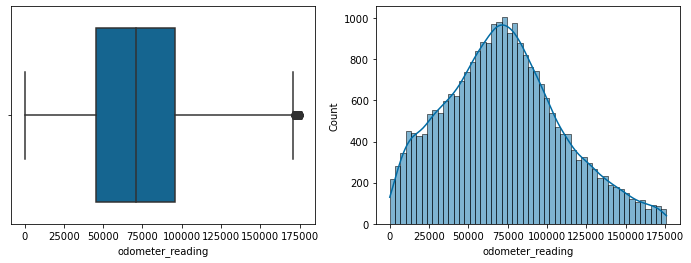

In [150]:
# odometer_reading
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data['odometer_reading'], ax=ax[0])
sns.histplot(data['odometer_reading'], kde=True, ax=ax[1])
plt.show()

- final shape of data after removing odometer_reading outliers

In [151]:
data.shape

(25514, 73)

### Analysis of rating_engineTransmission

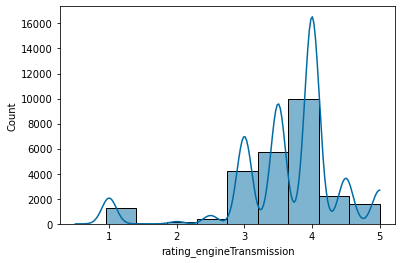

In [152]:
#  target variable i.e rating_engineTransmission
sns.histplot(data=data, x='rating_engineTransmission', bins=10, kde=True)
plt.show()

In [153]:
data['rating_engineTransmission'].value_counts()

4.0    9959
3.5    5775
3.0    4202
4.5    2195
5.0    1621
1.0    1241
2.5     402
2.0     112
1.5       6
0.5       1
Name: rating_engineTransmission, dtype: int64

- rating_engineTransmission 0.5, 1.5 & 2.0 have a very less count.

In [154]:
# Dropping appointmentId, inspectionStartTime & inspectionDate variables
data.drop(['appointmentId', 'inspectionStartTime', 'inspection_Date', 'inspection_Day', 'inspection_WeekDay'], axis=1, inplace=True)


In [155]:
data.head()

,inspection_Month,inspection_Hour,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,fuel_type,odometer_reading,rating_engineTransmission
0,3,15,2008,8,No,Weak,yes,yes,yes,yes,...,yes,yes,yes,Yes,yes,yes,yes,Petrol + CNG,124600,3.0
1,1,13,2007,5,Yes,yes,yes,yes,yes,yes,...,yes,yes,yes,Yes,yes,yes,yes,Petrol + CNG,78108,4.0
2,9,13,2012,5,Yes,yes,yes,yes,yes,yes,...,yes,yes,yes,Yes,yes,yes,yes,Diesel,93348,3.5
3,1,11,2013,1,Yes,yes,yes,yes,yes,yes,...,yes,yes,yes,Yes,yes,yes,yes,Petrol + CNG,48233,3.5
4,1,12,2011,7,Yes,yes,yes,yes,yes,yes,...,yes,yes,yes,Yes,yes,yes,yes,Petrol + CNG,74368,4.0


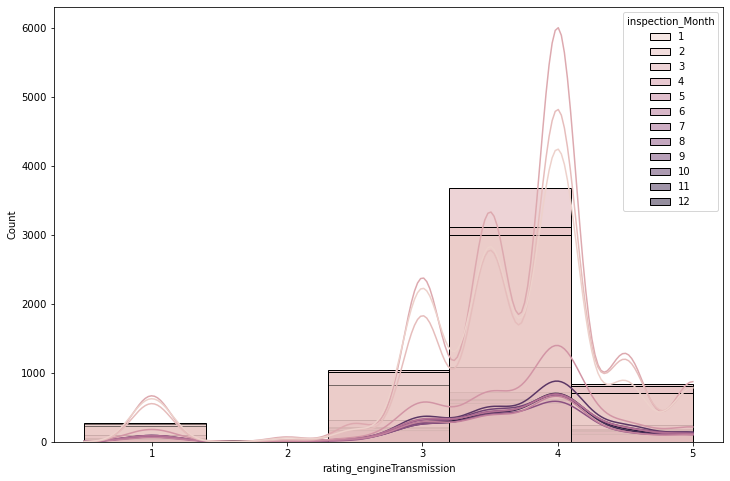

In [156]:
# Inspection month v/s rating_engineTransmission
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='rating_engineTransmission', bins=5, hue='inspection_Month', kde=True)
plt.show()

### > correlation

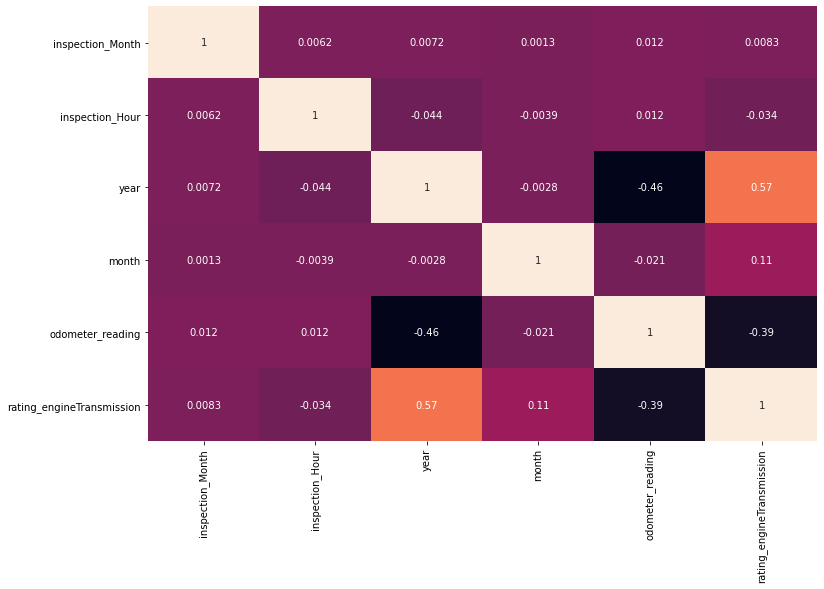

In [157]:
# correlation
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

## Data splitting

In [158]:
# 1. Split into training set & target
train = data.drop('rating_engineTransmission', axis=1).reset_index().drop('index', axis=1)
target = data['rating_engineTransmission'].reset_index().drop('index', axis=1)

# 2. Encode the categorical variables
train_encoded = pd.get_dummies(train, drop_first=True)

# 3. Scale the data
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(train_encoded), columns=train_encoded.columns)
y = target

### Split the data into train & test

In [160]:
# Split the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. LinearRegression

In [178]:
# LinearRegression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

model = LR.fit(X_train,y_train)
pred_LR=LR.predict(X_test)

LR_train_score = LR.score(X_train, y_train)
LR_val_score = LR.score(X_test, y_test)
print(LR_train_score, LR_val_score)

0.4267129458017145 -2.240509097865115e+16


In [179]:
print("b0: ", LR.intercept_)
print("b1,b2: ", LR.coef_)

b0:  [8.65373724e+09]
b1,b2:  [[ 1.41162223e-02 -4.88084743e-02  2.37147158e+00  2.64159046e-01
  -4.44278761e-01  6.71268349e+10 -6.23938998e-01 -4.70736684e-01
  -1.24533577e+00 -2.52010345e-01 -6.71268349e+10 -4.22404379e-01
  -3.65453929e-01 -5.54622769e-01 -1.66468740e-01  7.08271086e-01
   4.97922193e-01  2.06026196e-01 -4.91641402e-01  4.66772914e-01
   1.27760231e-01 -1.01985515e+10  1.01985515e+10 -1.07526561e+11
  -2.08473206e-02 -1.93049908e-02  1.24431849e-01  1.43497109e-01
   1.16691589e-01  9.38701630e-03  2.63183296e-01 -3.84211540e-01
   1.07526561e+11  3.50036621e-02  3.64856720e-02  6.57768250e-02
  -3.08732986e-02 -2.71139145e-02  1.62420273e-01 -2.51827240e-02
   4.93278503e-02 -9.00421143e-02 -1.19984150e-01 -1.76326632e-02
  -6.45997524e-02 -2.23707080e-01  9.28862095e-02 -9.55929756e-02
  -3.34720612e-02  8.41677189e-02 -6.87546730e-02 -6.60662055e-02
  -3.43649805e-01 -4.63962555e-04 -1.23796463e-02 -1.00506067e-01
   3.19434404e-02  4.91003990e-02  2.77519226e

In [180]:
print("Accuracy of LinearRegression is = ",LR.score(X_train,y_train))
LR_r2_score = r2_score(y_test,pred_LR)
print("Train R2 Score is = ",r2_score(y_test,pred_LR))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_LR))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_LR))

Accuracy of LinearRegression is =  0.4267129458017145
Train R2 Score is =  -2.240509097865115e+16
Train Mean Squared Error =  1.4675126036676328e+16
Train Mean absolute Squared Error =  1695814.1566532464


- Aaccuracy is very low in LinearRegression we need to try other algorithm

## 1. KNN Model

In [181]:
# 1. Building KNN model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
pred_knn=knn.predict(X_test)
# Print the R squared scores
knn_train_score = knn.score(X_train, y_train)
knn_val_score = knn.score(X_test, y_test)
print(knn_train_score, knn_val_score)

0.7339094331767849 0.6166457361512114


In [182]:
print("Accuracy of LR is = ",knn.score(X_train,y_train))
knn_r2_score = r2_score(y_test,pred_knn)
print("Train R2 Score is = ",r2_score(y_test,pred_knn))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_knn))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_knn))

Accuracy of LR is =  0.7339094331767849
Train R2 Score is =  0.6166457361512114
Train Mean Squared Error =  0.25109347442680774
Train Mean absolute Squared Error =  0.35408583186360965


## 2. Decision Tree

In [183]:
# 2. Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred_dt=dt.predict(X_test)
# Print the R squared scores
dt_train_score = dt.score(X_train, y_train)
dt_val_score = dt.score(X_test, y_test)
print(dt_train_score, dt_val_score)

1.0 0.3995364133013988


In [184]:
print("Accuracy of Decision Tree is = ",dt.score(X_train,y_train))
dt_r2_score = r2_score(y_test,pred_dt)
print("Train R2 Score is = ",r2_score(y_test,pred_dt))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_dt))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_dt))

Accuracy of Decision Tree is =  1.0
Train R2 Score is =  0.3995364133013988
Train Mean Squared Error =  0.3932980599647266
Train Mean absolute Squared Error =  0.41681363903586127


## 3. Random Forest 

In [185]:
# 3. Random Forest 
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_rf=rf.predict(X_test)
# Print the R squared scores
rf_train_score = rf.score(X_train, y_train)
rf_val_score = rf.score(X_test, y_test)
print(rf_train_score, rf_val_score)

0.9593292472959366 0.7078920346895305


In [186]:
print("Accuracy of Random Forest is = ",rf.score(X_train,y_train))
rf_r2_score = r2_score(y_test,pred_rf)
print("Train R2 Score is = ",r2_score(y_test,pred_rf))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_rf))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_rf))

Accuracy of Random Forest is =  0.9593292472959366
Train R2 Score is =  0.7078920346895305
Train Mean Squared Error =  0.19132799823633156
Train Mean absolute Squared Error =  0.3250352733686067


## 4. XGboost

In [187]:
# 5. XGboost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred_xgb=xgb.predict(X_test)
# Print the R squared scores
xgb_train_score = xgb.score(X_train, y_train)
xgb_val_score = xgb.score(X_test, y_test)
print(xgb_train_score, xgb_val_score)

0.8203580285108101 0.7102713566735066


In [188]:
print("Accuracy of  XGboost is = ",xgb.score(X_train,y_train))
xgb_r2_score = r2_score(y_test,pred_xgb)
print("Train R2 Score is = ",r2_score(y_test,pred_xgb))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_xgb))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_xgb))

Accuracy of  XGboost is =  0.8203580285108101
Train R2 Score is =  0.7102713566735066
Train Mean Squared Error =  0.18976956448437968
Train Mean absolute Squared Error =  0.3282843981680626


## Displaying the results

In [189]:
# Displaying the results
model_results_arr = {'train_socres' : [LR_train_score,knn_train_score, dt_train_score, rf_train_score, xgb_train_score], 
                     'validation_scores' : [LR_val_score,knn_val_score, dt_val_score, rf_val_score, xgb_val_score],
                    'R2 score' : [LR_r2_score,knn_r2_score, dt_r2_score, rf_r2_score, xgb_r2_score]
                    }
results_df = pd.DataFrame(model_results_arr, index=['LinearRegression','KNN', 'DecisionTree', 'RandomForest', 'XGBoost'])
results_df

,train_socres,validation_scores,R2 score
LinearRegression,0.426713,-2.240509e+16,-2.240509e+16
KNN,0.733909,6.166457e-01,6.166457e-01
DecisionTree,1.000000,3.995364e-01,3.995364e-01
RandomForest,0.959329,7.078920e-01,7.078920e-01
XGBoost,0.820358,7.102714e-01,7.102714e-01


- here we can see that the accuracy of all model that we listed above are 
    1. LinearRegression, KNN, DecisionTree, RandomForest models are giving results with overfitting.
    2. XGboost models which are showing generalization.

In [193]:
# Storing the model in a pickle file
final_model = xgb
with open('final_model_XGboost', 'wb') as files:
    pickle.dump(final_model, files)

-Please answer the following:
1. Briefly describe your approach to this problem and the steps you took
    Ans: i have done some EDA on data set and put my analysis after each EDA.
        A. about data Description
           i. in above we see that type of inspectionStartTime column is object and it is date type column so we need to change its data type o date and time
       B. About NULL values
              i. Total number of columns which has more than 40% null values in it: 52
               52 out of 73 independent varaibles have more then 40% null values.
          ii.lest say hypothesis
                I. From the Fields_Summary, it seems that null values have to be imputed as "yes" in most of columns.
          iii. 47 out of 53 variables have a description of "current condition if not yes"
          iv.hance we can conclude that our hypothesis is true, out of 52 columns 47 column has yes as defult value so we fill the null value of all 47 columns as yes.
          v.lest check other 4 columes those has null value but condtion is other then current "condition if not yes"
          vi. As we can analyze that in above columns has more the 80% of null values and they are also not under condition of 40% more null values in it.
           vii.we have 2 options over here
                I. drop those colums
                II. We can impute "no" in above columns as mentioned in Fields_Summary
                III.it is better to drop those colums as they are not important as per above analysis
            
            

- About data
    
    1. total vraible data in DB including target variable :  5
    2.Total Categorcal data in DB :  63
    3.here we can see that out of 68 columns 64 are categorical data type and only 4 are variable data type
    4. which means 94% data are categorical data type and only 5.8% data are varibale data type

2. Basics:
    1. How well does your model work?
      Ans : I have try 4 model in which Xgboot has give very good Accuracy and validation scroce as compare to other aalgorithm that i have used
    
    2. How do you know for sure that’s how well it works?
     Ans: based on there there train_socres,validation_scores,R2 score
            
    3. What stats did you use to prove its predictive performance and why?
    
    4. What issues did you encounter?
     Ans: overfitting 
    5. What insights did you obtain from this data? For example: What features are important? Why? What visualisations help you understand the data?
        Ans : there are some features that is imp in this data set are inspection details,Odometer reading, year of registration.
3. Next steps:
    1. What other data (if any) would have been useful?
    Ans : total year of running,number of servers that they have till date, parts change if any
    2. What are some other things you would have done if you had more time?
    ans Deep learing model